 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [38]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [39]:
# Reading whale returns
whale_returns_csv = Path("../Starter_Code/Resources/whale_returns.csv")

# Read in data, using dateyimie index

whale_returns_df = pd.read_csv(whale_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
# I believe 'Parse_dates=True' will sort the date index when infer_datetime_format is used, but just to be sure.
whale_returns_df.sort_index(ascending=True, inplace=True)

In [40]:
# Count nulls
whale_returns_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [41]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
2015-03-09,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [42]:
# Reading algorithmic returns
algo_returns_csv = Path("../Starter_Code/Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns_df.sort_index(ascending=True, inplace=True)

In [43]:
# Count nulls

# Check for nulls
algo_returns_df.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [44]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [45]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_history_df.sort_index(ascending=True, inplace=True)

In [46]:
# Check Data Types
sp500_history_df.head()
sp500_history_df.dtypes

Close    object
dtype: object

In [47]:
# Fix Data Types
sp500_history_df['Close'].dtypes
# Remove the '$' from 'Close' column and change the data type to float form str
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '', regex=True)
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df['Close'].dtypes
sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [48]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [49]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)


In [50]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ['SP500 Close']
sp500_daily_returns.head()

,SP500 Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [51]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_daily_returns = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis='columns', join='inner')
combined_daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

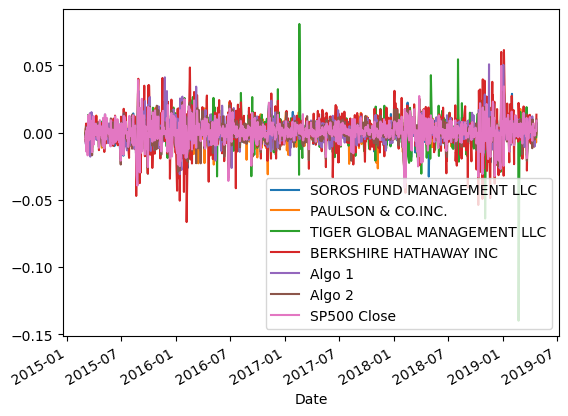

In [52]:
# Plot daily returns of all portfolios
combined_daily_returns.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

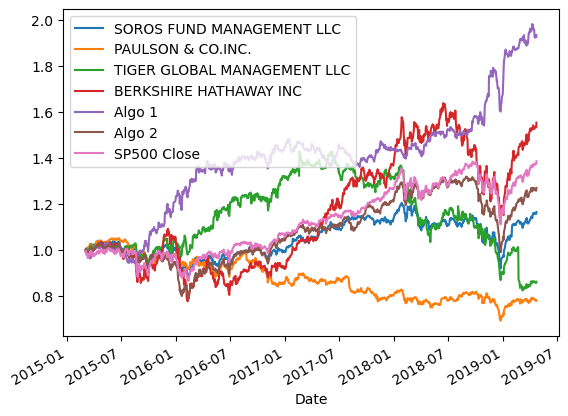

In [53]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_daily_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk Analysis'}>

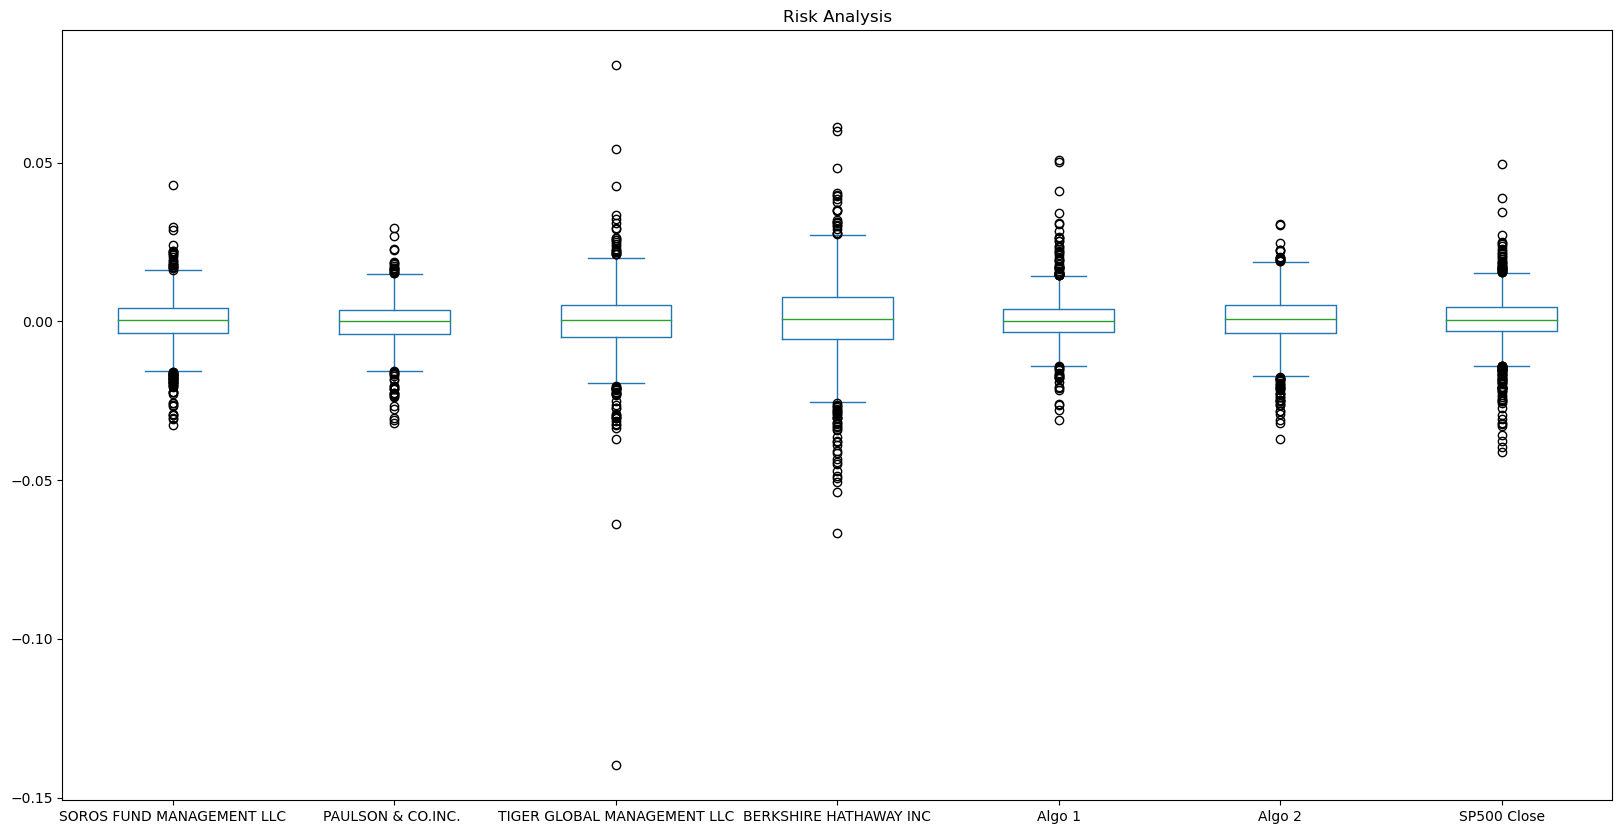

In [54]:
# Box plot to visually show risk
combined_daily_returns.plot(kind="box", title= "Risk Analysis", figsize=(20,10))

### Calculate Standard Deviations

In [55]:
# Calculate the daily standard deviations of all portfolios
combined_daily_returns_std = combined_daily_returns.std()
combined_daily_returns_std


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500 Close                    0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [56]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
more_risk_than_SP500 =[combined_daily_returns_std > combined_daily_returns_std['SP500 Close']]
more_risk_than_SP500


[SOROS FUND MANAGEMENT LLC      False
 PAULSON & CO.INC.              False
 TIGER GLOBAL MANAGEMENT LLC     True
 BERKSHIRE HATHAWAY INC          True
 Algo 1                         False
 Algo 2                         False
 SP500 Close                    False
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [57]:
# Calculate the annualized standard deviation (252 trading days)
annualized_daily_returns = combined_daily_returns_std *np.sqrt(252)
annualized_daily_returns

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500 Close                    0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Rolling'}, xlabel='Date'>

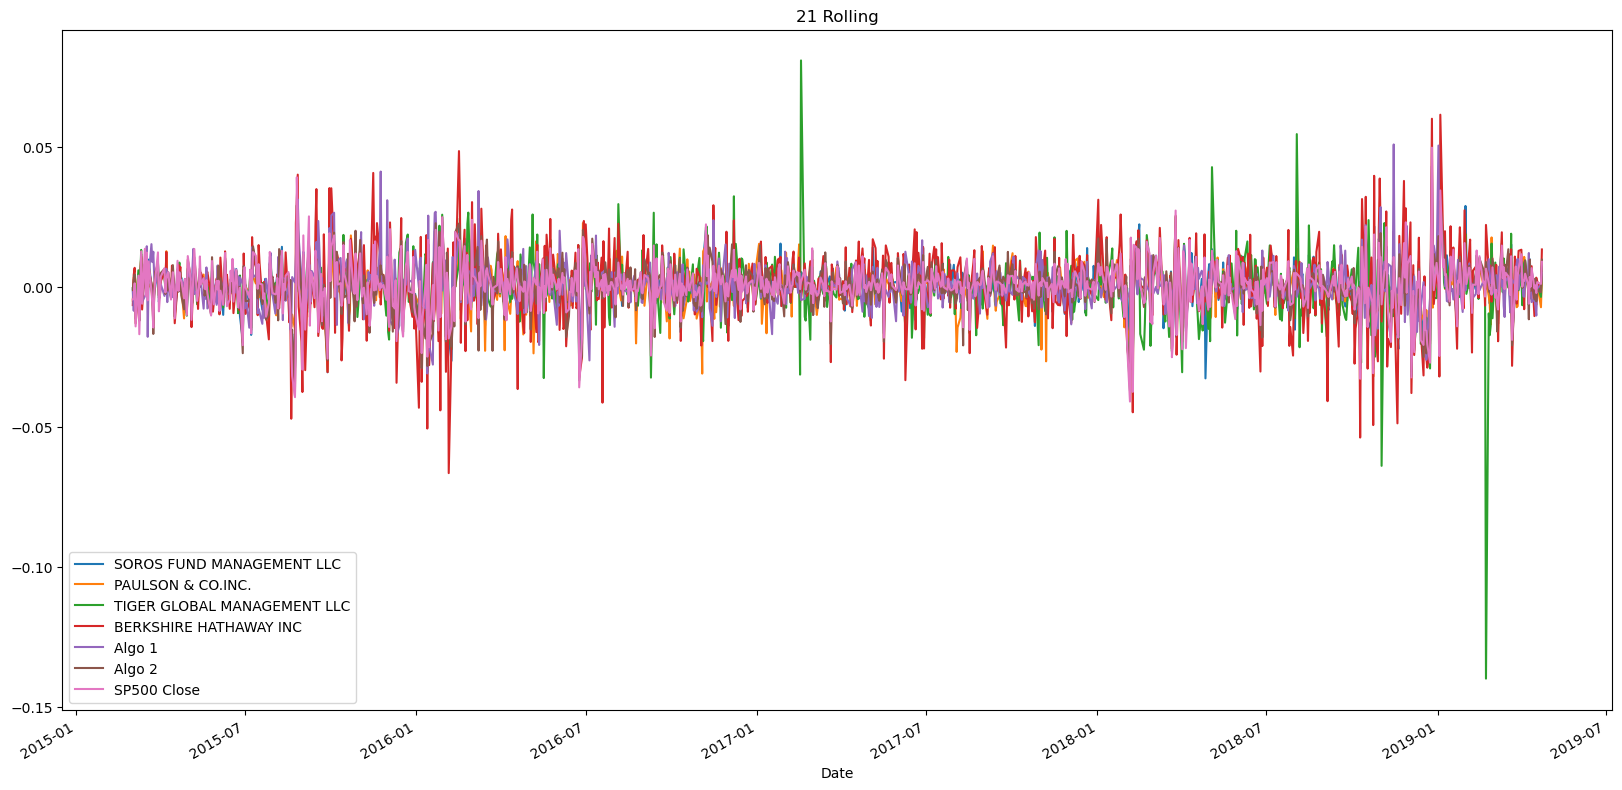

In [58]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_daily_returns.rolling(window=21).std
combined_daily_returns.plot(title="21 Rolling", figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

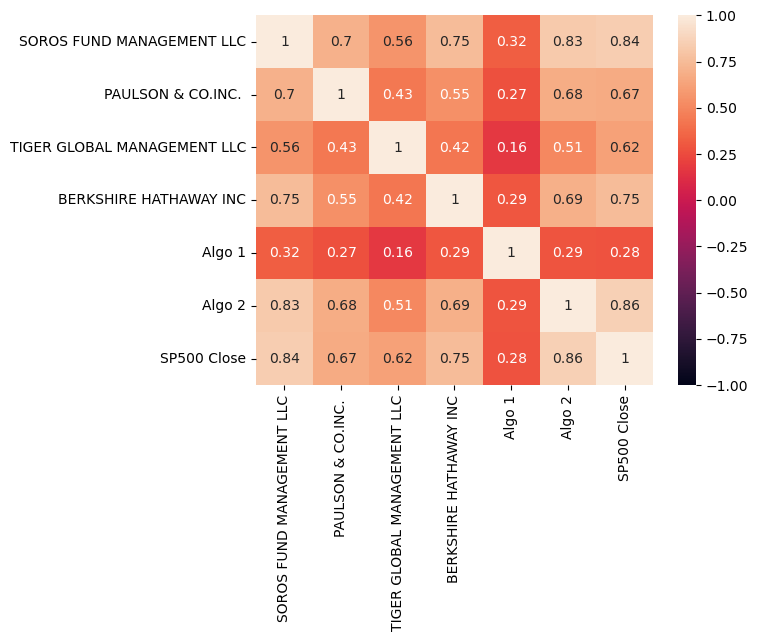

In [59]:
# Calculate the correlation
correlation_of_returns = combined_daily_returns.corr()

# Display de correlation matrix
correlation_of_returns

# Using heatmap to determine corrrlations

sns.heatmap(correlation_of_returns, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

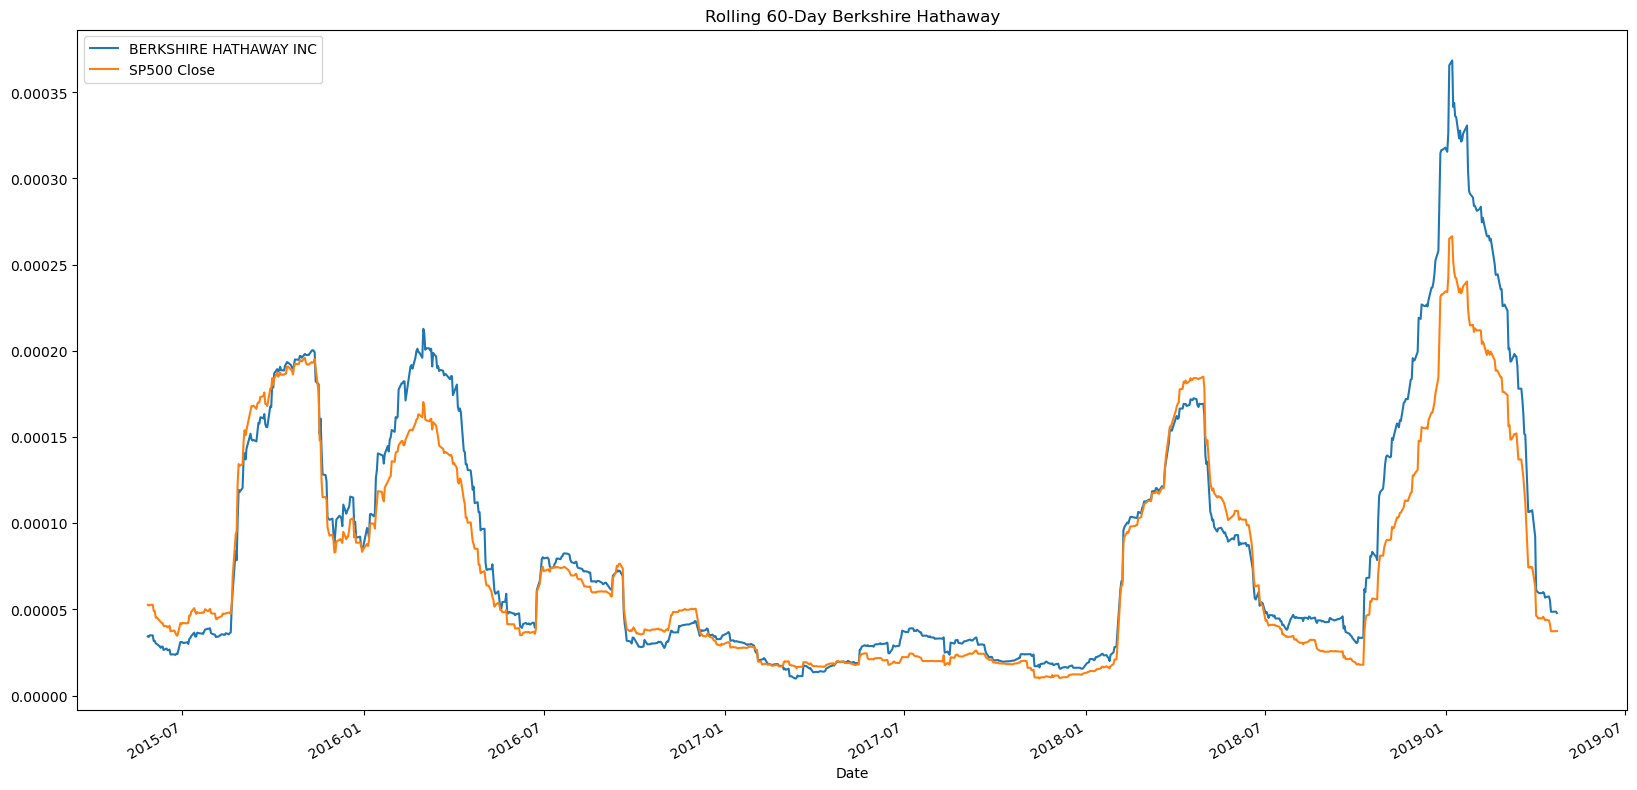

In [60]:
# Calculate covariance of BERKSHIRE portfolio
berk_covariance = combined_daily_returns['BERKSHIRE HATHAWAY INC'].cov(combined_daily_returns['SP500 Close'])

# Calculate variance of SP500 Close
variance = combined_daily_returns['SP500 Close'].var()

# Computing BERKSHIRE beta
berk_beta = berk_covariance / variance

# Plot beta trend
berk_rolling_beta = combined_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_daily_returns['SP500 Close'])
variance = combined_daily_returns['SP500 Close'].rolling(window=60).var()

ax = berk_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Berkshire Hathaway')
variance.plot(ax=ax)
# Set the legend of the figure
ax.legend(["BERKSHIRE HATHAWAY INC", "SP500 Close"])



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

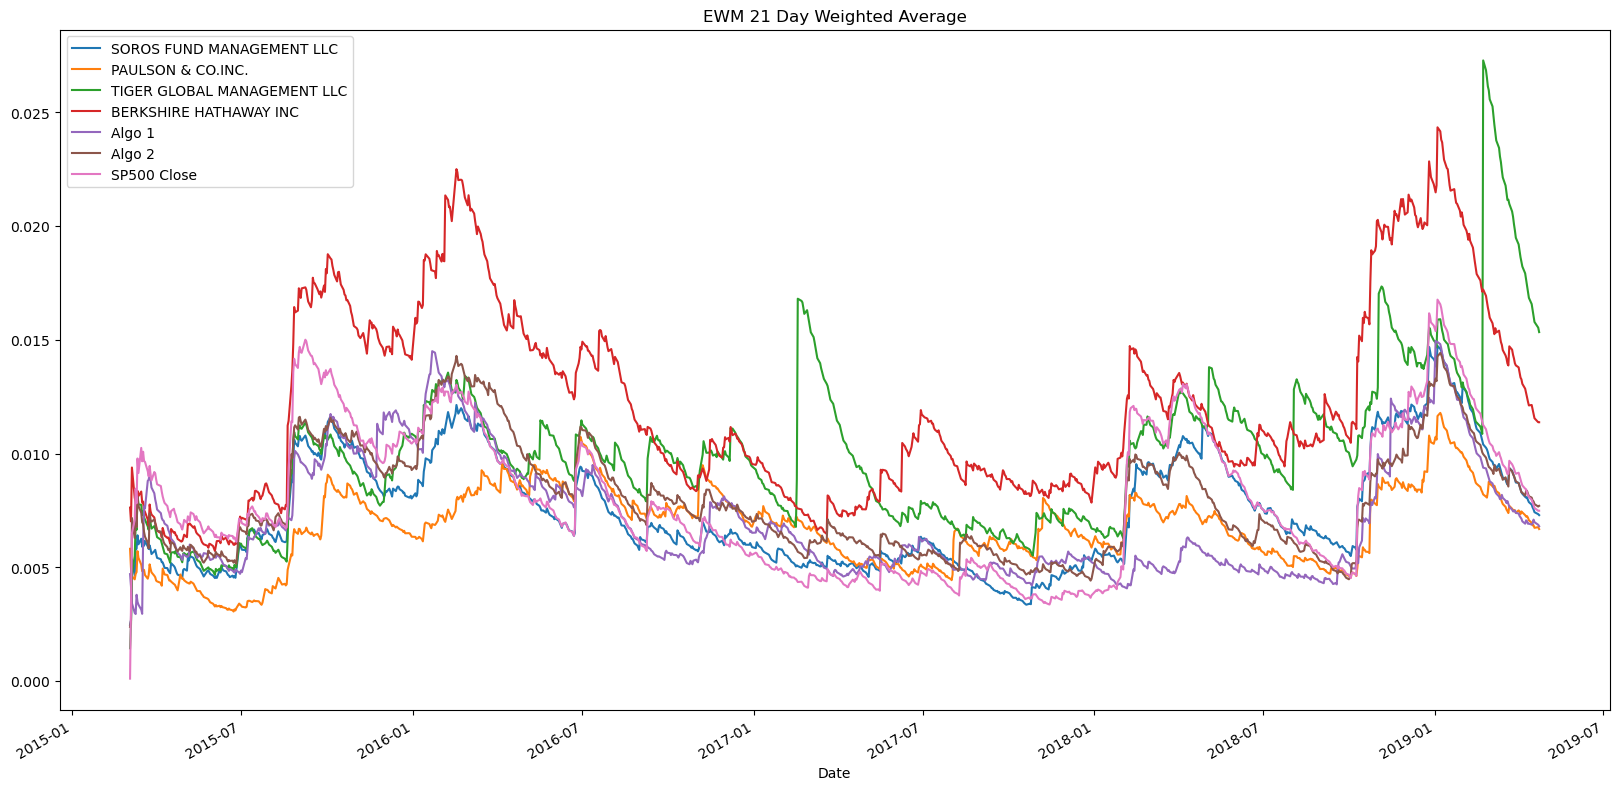

In [61]:
# Use `ewm` to calculate the rolling window
evm_combined_returns = combined_daily_returns.ewm(halflife=21, adjust=True).std().plot(title="EWM 21 Day Weighted Average", figsize=(20, 10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [62]:
# Annualized Sharpe Ratios
combined_daily_returns_sharp = (combined_daily_returns.mean() * 252) / (combined_daily_returns.std() * np.sqrt(252))
combined_daily_returns_sharp

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500 Close                    0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of all Portfolios'}>

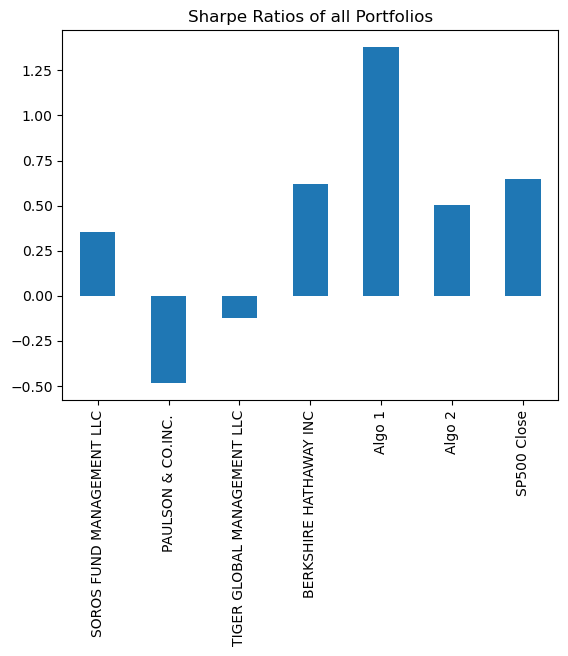

In [63]:
# Visualize the sharpe ratios as a bar plot
combined_daily_returns_sharp.plot(kind="bar", title="Sharpe Ratios of all Portfolios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

"Algo 1" definately outperformed the SP500 and provided the least ammount of risk according to the Sharp ratio.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [142]:
# Reading data from 1st stock
jnj_csv = Path("../Starter_Code/Resources/jnj.csv")
johnson_and_johnson_df = pd.read_csv(jnj_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
johnson_and_johnson_df.index = johnson_and_johnson_df.index.normalize()
johnson_and_johnson_df

,Close
Date,
2014-05-28,100.30
2014-05-29,100.76
2014-05-30,101.46
2014-06-02,102.17
2014-06-03,102.46
...,...
2019-04-24,139.20
2019-04-25,139.65
2019-04-26,140.39


In [141]:
# Reading data from 2nd stock
reality_growth_csv = Path("../Starter_Code/Resources/reality_growth.csv")
reality_growth_df = pd.read_csv(reality_growth_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
reality_growth_df.index = reality_growth_df.index.normalize()
reality_growth_df

,Close
Date,
2014-05-28,16.00
2014-05-29,15.55
2014-05-30,15.42
2014-06-02,15.29
2014-06-03,15.31
...,...
2019-04-24,21.02
2019-04-25,20.73
2019-04-26,20.50


In [140]:
# Reading data from 3rd stock
adobe_csv = Path("../Starter_Code/Resources/adobe.csv")
adobe_df = pd.read_csv(adobe_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
adobe_df.index = adobe_df.index.normalize()
adobe_df

,Close
Date,
2014-05-28,64.84
2014-05-29,65.45
2014-05-30,64.54
2014-06-02,64.64
2014-06-03,64.09
...,...
2019-04-24,275.45
2019-04-25,277.66
2019-04-26,281.96


In [143]:
# modify column headers
johnson_and_johnson_df.columns = ['JNJ']
reality_growth_df.columns = ['CTO']
adobe_df.columns = ['adobe']
johnson_and_johnson_df.head()

,JNJ
Date,
2014-05-28,100.30
2014-05-29,100.76
2014-05-30,101.46
2014-06-02,102.17
2014-06-03,102.46


In [144]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([reality_growth_df, adobe_df, johnson_and_johnson_df], axis='columns', join='inner')
custom_portfolio

,CTO,adobe,JNJ
Date,,,
2014-05-28,16.00,64.84,100.30
2014-05-29,15.55,65.45,100.76
2014-05-30,15.42,64.54,101.46
2014-06-02,15.29,64.64,102.17
2014-06-03,15.31,64.09,102.46
...,...,...,...
2019-04-24,21.02,275.45,139.20
2019-04-25,20.73,277.66,139.65
2019-04-26,20.50,281.96,140.39


In [145]:
# Reset Date index
custom_portfolio.sort_index(ascending=True, inplace=True)
custom_portfolio.head()

,CTO,adobe,JNJ
Date,,,
2014-05-28,16.00,64.84,100.30
2014-05-29,15.55,65.45,100.76
2014-05-30,15.42,64.54,101.46
2014-06-02,15.29,64.64,102.17
2014-06-03,15.31,64.09,102.46


In [70]:
# Reorganize portfolio data by having a column per symbol -->  completed when renaming columns


In [146]:
# Calculate daily returns
custom_portfolio_daily_returns = custom_portfolio.pct_change()
custom_portfolio_daily_returns
# Drop NAs
custom_portfolio_daily_returns.dropna(inplace=True)
# Display sample data
custom_portfolio_daily_returns


,CTO,adobe,JNJ
Date,,,
2014-05-29,-0.028125,0.009408,0.004586
2014-05-30,-0.008360,-0.013904,0.006947
2014-06-02,-0.008431,0.001549,0.006998
2014-06-03,0.001308,-0.008509,0.002838
2014-06-04,-0.001306,0.001248,0.002147
...,...,...,...
2019-04-24,-0.001425,-0.010916,-0.005004
2019-04-25,-0.013796,0.008023,0.003233
2019-04-26,-0.011095,0.015487,0.005299


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [147]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_weighted_returns = custom_portfolio_daily_returns.dot(weights)

# Display sample data
custom_portfolio_weighted_returns.head()
# need a header


Date
2014-05-29   -0.004710
2014-05-30   -0.005106
2014-06-02    0.000039
2014-06-03   -0.001454
2014-06-04    0.000696
dtype: float64

In [148]:
custom_portfolio_weighted_returns.name = "Custom"
custom_portfolio_weighted_returns.name

'Custom'

In [151]:
type(custom_portfolio_weighted_returns)

pandas.core.series.Series

In [152]:
type(combined_daily_returns)

pandas.core.frame.DataFrame

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [157]:
# comparing my data type and trouble-shooting some issues I had with normalizing the index.

combined_daily_returns.index
type(combined_daily_returns)

pandas.core.frame.DataFrame

In [150]:
custom_portfolio_weighted_returns.index

DatetimeIndex(['2014-05-29', '2014-05-30', '2014-06-02', '2014-06-03',
               '2014-06-04', '2014-06-05', '2014-06-06', '2014-06-09',
               '2014-06-10', '2014-06-11',
               ...
               '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-22',
               '2019-04-23', '2019-04-24', '2019-04-25', '2019-04-26',
               '2019-04-29', '2019-04-30'],
              dtype='datetime64[ns]', name='Date', length=1239, freq=None)

In [162]:
# Join your returns DataFrame to the original returns DataFrame
all_returns_df = pd.concat([custom_portfolio_weighted_returns, combined_daily_returns], axis="columns")
all_returns_df

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,,
2014-05-29,-0.004710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-30,-0.005106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-02,0.000039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-03,-0.001454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-04,0.000696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-24,-0.005782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-25,-0.000847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-26,0.003230,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns_df.dropna(inplace=True)
all_returns_df.isnull()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,,
2015-03-03,False,False,False,False,False,False,False,False
2015-03-04,False,False,False,False,False,False,False,False
2015-03-05,False,False,False,False,False,False,False,False
2015-03-06,False,False,False,False,False,False,False,False
2015-03-09,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2019-04-16,False,False,False,False,False,False,False,False
2019-04-17,False,False,False,False,False,False,False,False
2019-04-18,False,False,False,False,False,False,False,False


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [165]:
# Calculate the annualized `std`
all_returns_df_std = all_returns_df.std()
all_returns_df_std

Custom                         0.010240
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500 Close                    0.008554
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Rolling'}, xlabel='Date'>

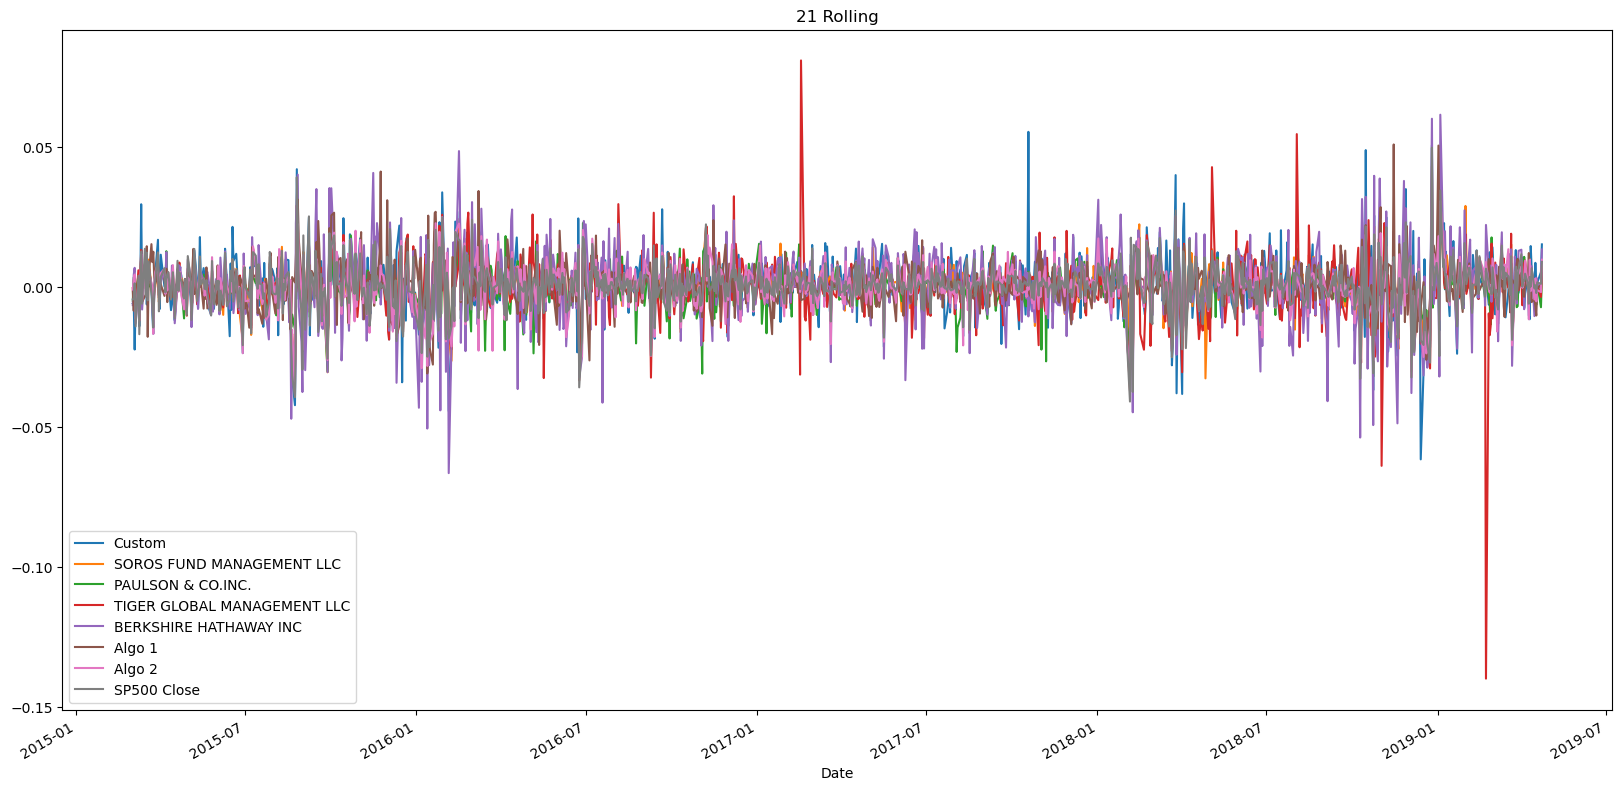

In [168]:
# Calculate rolling standard deviation
all_returns_df.rolling(window=21).std

# Plot rolling standard deviation
all_returns_df.plot(title="21 Rolling", figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

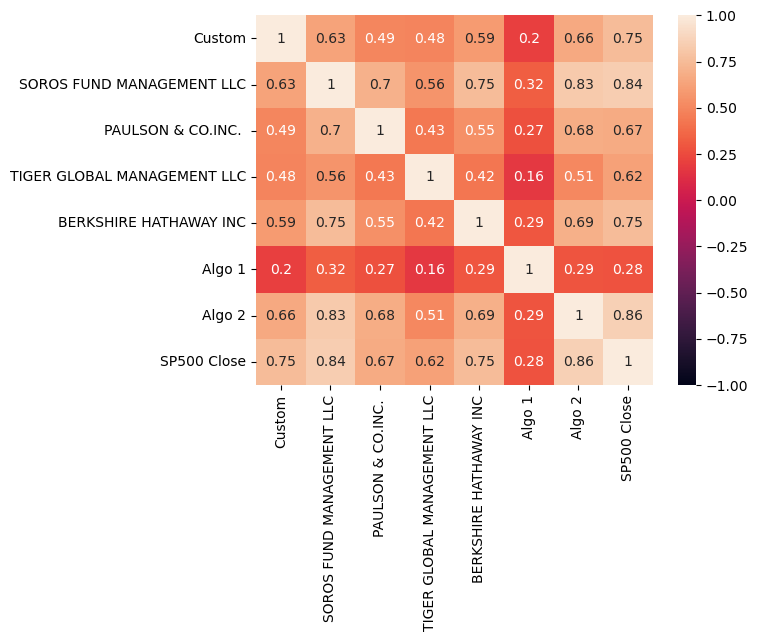

In [171]:
# Calculate and plot the correlation
all_returns_df_corr = all_returns_df.corr()

all_returns_df_corr

sns.heatmap(all_returns_df_corr, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

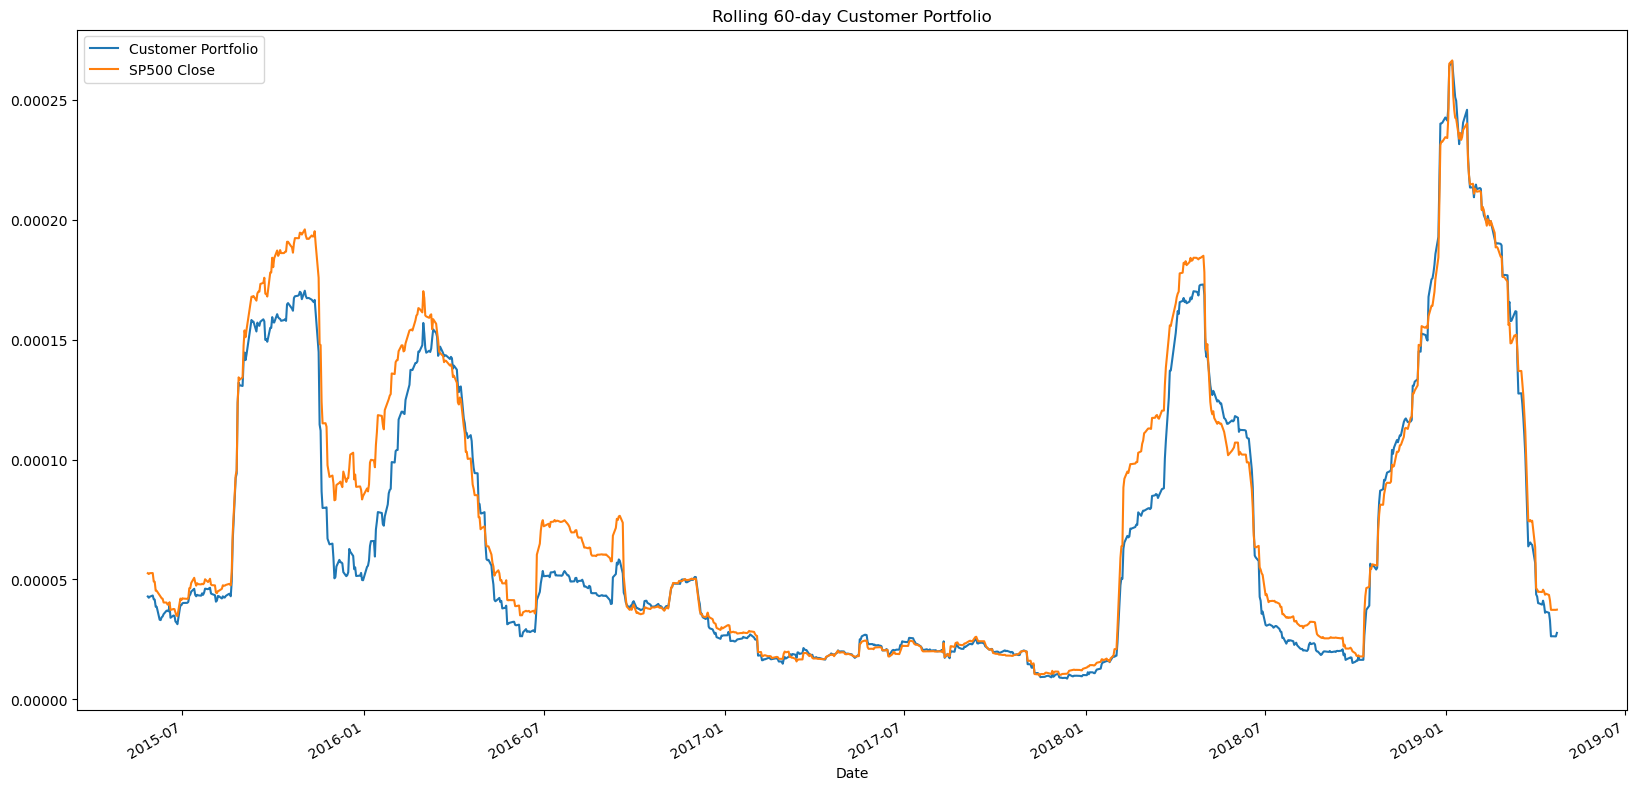

In [178]:
# Calculate covariance for customer portfolio
custom_covariance = all_returns_df['Custom'].cov(all_returns_df['SP500 Close'])

# Calculate variance of SP500 Close

variance = all_returns_df['SP500 Close'].var()

# Compute Custom beta
custom_beta = custom_covariance / variance

# Plot bete trend

custom_rolling_beta = all_returns_df['Custom'].rolling(window=60).cov(all_returns_df['SP500 Close'])
variance = all_returns_df['SP500 Close'].rolling(window=60).var()

ax = custom_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-day Customer Portfolio')
variance.plot(ax=ax)

# setup the legend
ax.legend(["Customer Portfolio", "SP500 Close"])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [180]:
# Calculate Annualized Sharpe Ratios
all_returns_df_sharp = (all_returns_df.mean() * 252) / (all_returns_df.std() * np.sqrt(252))
all_returns_df_sharp

Custom                         0.966700
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500 Close                    0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios for all Portfolios'}>

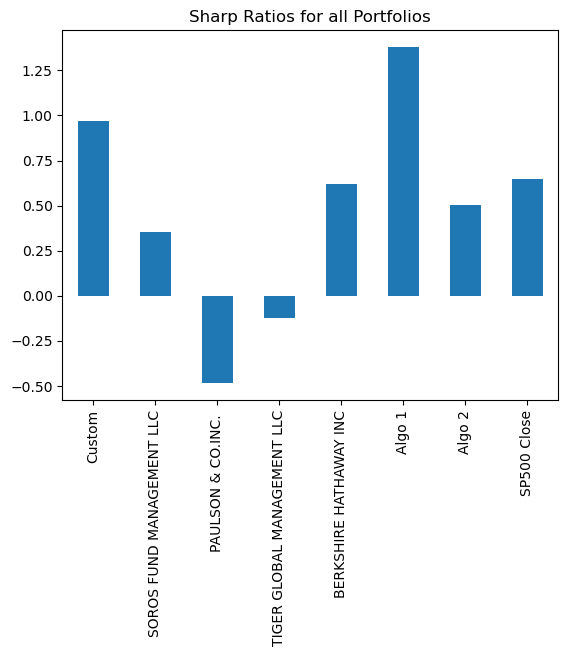

In [181]:
# Visualize the sharpe ratios as a bar plot
all_returns_df_sharp.plot(kind="bar", title="Sharp Ratios for all Portfolios")

### How does your portfolio do?

 My JNJ, and REIT CTO dividend stocks had typical growth for those stock types.   My Adobe stock did enjoy large growth.  My portfolio follows the SP500 and Algo 2 rather closely based on the heatmap and the Rolling 60 day Beta.  I choose JNJ and CTO for the lower volatility, and choose Adobe for growth. I choose these stock to get somewhat of a balanced portfolio. Hind sight works great!